In this assignment students will build the random forest model after
normalizing the variable to house pricing from boston data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets

In [2]:
#loading data
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target

In [3]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
targets

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
features['targets']=targets

In [6]:
features.shape

(506, 14)

In [7]:
features.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,targets
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [8]:
features.isnull().sum() #checking for null values


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
targets    0
dtype: int64

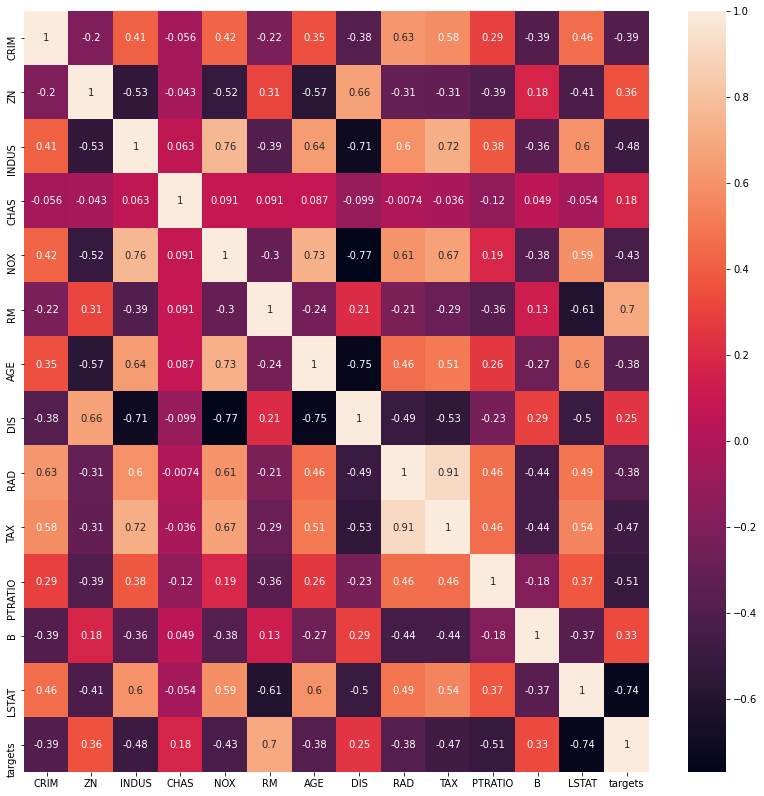

In [9]:
corr=features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,yticklabels=True)

In [16]:
#normalising data
x=features.drop(columns=['targets'],axis=1)
y=features['targets']

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [17]:
x_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [18]:
#splitting data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=100)

In [19]:
y_train

463    20.2
75     21.4
478    14.6
199    34.9
84     23.9
       ... 
343    23.9
359    22.6
323    18.5
280    45.4
8      16.5
Name: targets, Length: 354, dtype: float64

In [20]:
x_train.shape,y_test.shape

((354, 13), (152,))

##Applying random forest 

In [21]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [22]:
y_pred

array([32.823, 27.86 , 18.471, 20.037, 20.067, 22.937, 25.958, 22.479,
       21.304, 15.884, 23.377, 15.247, 24.948, 19.249, 47.808, 25.383,
       23.427, 21.229, 31.419, 46.299, 34.016, 17.146, 18.883, 16.684,
        9.571, 14.638, 27.627, 16.626, 15.85 , 19.287, 17.746, 20.48 ,
       41.974, 24.717, 28.264, 36.133, 21.704, 14.14 , 14.336, 21.438,
       20.139, 24.269, 15.076, 20.849, 24.831, 24.556, 19.456, 15.202,
       13.574, 14.985, 19.999, 20.113, 22.17 , 26.974, 14.102, 18.025,
       33.697, 35.747,  9.92 , 20.955, 13.495, 17.061, 17.381, 32.866,
       20.36 , 23.68 , 17.591, 30.435, 21.952, 20.367, 14.016, 17.821,
        8.43 , 16.562, 30.256,  9.503, 24.372, 44.131, 13.516, 22.443,
       44.935, 44.292, 15.119, 14.031, 15.397, 14.266, 20.477, 22.109,
       12.629, 19.063, 26.71 , 22.089, 22.673, 23.711, 17.095, 17.758,
       24.708, 47.655,  9.745, 30.636, 16.112, 13.671, 13.64 , 24.302,
       33.596, 19.183, 23.046, 13.092, 15.125, 26.673, 24.473, 31.7  ,
      

In [23]:
#evaluation
from sklearn.metrics import r2_score
acc=r2_score(y_test,y_pred)
acc

0.8091662371328746